In [1]:
from bs4 import BeautifulSoup

In [3]:
import requests

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG']

news_tables = {}

In [8]:
import urllib

In [68]:
for ticker in tickers:
    url = finviz_url + ticker

    req = requests.get(url=url, headers={'user-agent': 'my-app'})
    html = BeautifulSoup(req.text, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

In [69]:
for ticker, news_table in news_tables.items():

    for row in news_table.find_all('tr'):

        title = row.a.text
        date_data = row.td.text.replace('\r\n','').strip().split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

In [74]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [75]:
df.head()

,ticker,date,time,title
0,AMZN,Today,06:00PM,The 10 Best Kirkland Products at Costco
1,AMZN,Today,11:02AM,15 Spectacular Floating Hotels Around The World
2,AMZN,Today,10:47AM,"3 No-Brainer Stocks to Buy Right Now With $1,0..."
3,AMZN,Today,08:30AM,"3 Magnificent Stocks That I'm ""Never"" Selling"
4,AMZN,Today,06:35AM,Forget Nvidia: This Artificial Intelligence (A...


In [76]:
df.tail()

,ticker,date,time,title
195,GOOG,Mar-27-24,03:32PM,A 'nightmare' new ChatGPT crypto scam is flood...
196,GOOG,Mar-27-24,01:54PM,Google will let you swipe right or left on clo...
197,GOOG,Mar-27-24,01:35PM,Hedge Fund and Insider Trading News: Bill Ackm...
198,GOOG,Mar-27-24,12:57PM,Bragg Gaming Group Inc. (NASDAQ:BRAG) Q4 2023 ...
199,GOOG,Mar-27-24,12:54PM,"McCormick & Company, Incorporated (NYSE:MKC) Q..."


In [77]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

In [78]:
df.tail()

,ticker,date,time,title,compound
195,GOOG,Mar-27-24,03:32PM,A 'nightmare' new ChatGPT crypto scam is flood...,-0.5719
196,GOOG,Mar-27-24,01:54PM,Google will let you swipe right or left on clo...,0.4404
197,GOOG,Mar-27-24,01:35PM,Hedge Fund and Insider Trading News: Bill Ackm...,0.0000
198,GOOG,Mar-27-24,12:57PM,Bragg Gaming Group Inc. (NASDAQ:BRAG) Q4 2023 ...,0.0000
199,GOOG,Mar-27-24,12:54PM,"McCormick & Company, Incorporated (NYSE:MKC) Q...",0.0000


In [116]:
def convert_to_date(date_str):
    if date_str == 'Today':
        return datetime.today().date()
    else:
        return pd.to_datetime(date_str, errors='coerce')

# Apply the function to the 'date' column
df['date'] = df['date'].apply(convert_to_date)

In [117]:
df.head()

,ticker,date,time,title,compound
0,AMZN,2024-03-31,06:00PM,The 10 Best Kirkland Products at Costco,0.6369
1,AMZN,2024-03-31,11:02AM,15 Spectacular Floating Hotels Around The World,0.0000
2,AMZN,2024-03-31,10:47AM,"3 No-Brainer Stocks to Buy Right Now With $1,0...",0.0000
3,AMZN,2024-03-31,08:30AM,"3 Magnificent Stocks That I'm ""Never"" Selling",0.5994
4,AMZN,2024-03-31,06:35AM,Forget Nvidia: This Artificial Intelligence (A...,0.7269


In [120]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [135]:
df['date'] = pd.to_datetime(df['date'])
mean_df = df.groupby(['ticker', 'date'])['compound'].mean().unstack()

In [128]:
print(mean_df)

date    2024-03-26  2024-03-27  2024-03-28  2024-03-29  2024-03-31
ticker                                                            
AMZN      0.101527    0.150663    0.257909    0.198375    0.339070
GOOG           NaN    0.166988    0.214210    0.320886    0.192942


In [141]:
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%Y-%m-%d")

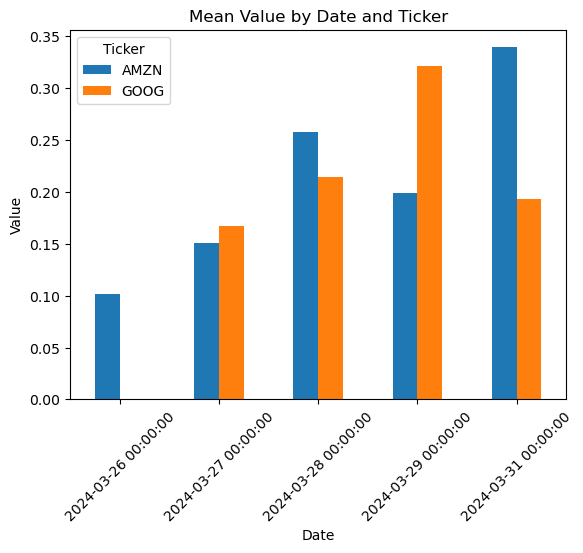

In [148]:
mean_df = mean_df.T
mean_df.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean Value by Date and Ticker')
plt.xticks(rotation=45)
plt.legend(title='Ticker')